In [1]:
function [X, omega] = mrw_classic(N, lambda2)
% MRW_CLASSIC  Direct O(N^2) MRW generator (Bacry–Delour–Muzy)

    rng('shuffle');

    % Log‑correlated field
    omega = zeros(N,1);
    for i = 1:N
        s = 0;
        for j = 1:N
            dist = abs(i-j);
            if dist > 0
                s = s + randn() / sqrt(dist + 1);
            end
        end
        omega(i) = sqrt(lambda2) * s / sqrt(N);
    end

    % Center field
    omega = omega - mean(omega);

    % MRW integration
    X = zeros(N,1);
    for i = 2:N
        X(i) = X(i-1) + randn() * exp(omega(i));
    end
end


In [2]:
function [X, omega] = mrw_fft(N, lambda2)
% MRW_FFT  Fast O(N log N) MRW generator using FFT
% Implements Bacry–Delour–Muzy spectral construction

    rng('shuffle');

    % Build positive‑frequency spectrum
    freq = zeros(N/2+1,1);
    for k = 0:(N/2)
        if k == 0
            amp = 0;
        else
            amp = sqrt(lambda2 / k);
        end
        phase = 2*pi*randn();
        freq(k+1) = amp * exp(1i*phase);
    end

    % Hermitian symmetry for real IFFT
    fullSpec = zeros(N,1);
    fullSpec(1:(N/2+1)) = freq;
    fullSpec((N/2+2):N) = conj(freq(end-1:-1:2));

    % Inverse FFT → log‑correlated field
    omega = real(ifft(fullSpec)) / sqrt(N);
    omega = omega - mean(omega);

    % MRW integration
    X = zeros(N,1);
    for i = 2:N
        X(i) = X(i-1) + randn() * exp(omega(i));
    end
end



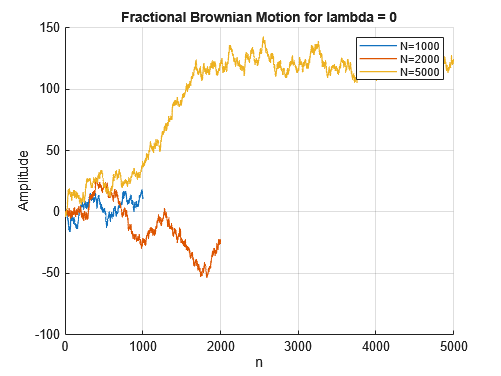


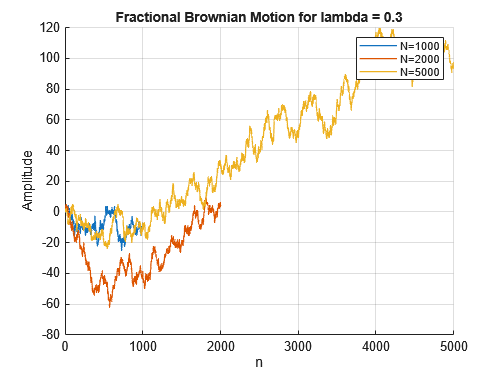

In [3]:
clear; close all; clc;

%% ---------------------------------------------------------
% PARAMETERS
% ---------------------------------------------------------
lambda  = [0.0, 0.3, 0.5, 0.9];                 % lambda
Nvals  = [1000, 2000, 5000];       % different noise lengths
qvals  = -2:0.1:2;                            % q for tau(q)
numH   = numel(lambda);
numN   = numel(Nvals);

colorsN = lines(numN);                    % colors for different N

%% ---------------------------------------------------------
% STORAGE FOR RESULTS
% mrw{hi,ni}        - signal
% dh{hi,ni}, h{hi,ni} - multifractal spectrum
% cp{hi,ni}         - cumulants [C1 C2 C3]
% tauq{hi,ni}       - scaling function tau(q)
% leaders{hi,ni}    - leaders by scale
% structfunc{hi,ni} - structure function info (Tq, weights, logscales)
% ---------------------------------------------------------
mrw        = cell(numH, numN);
dh         = cell(numH, numN);
h          = cell(numH, numN);
cp         = cell(numH, numN);
tauq       = cell(numH, numN);
leaders    = cell(numH, numN);
structfunc = cell(numH, numN);

%% ---------------------------------------------------------
% MAIN LOOP: GENERATE SIGNALS AND RUN DWTLEADER ONCE
% ---------------------------------------------------------
for hi = 1:numH
    l = lambda(hi);
    for ni = 1:numN
        N = Nvals(ni);

        % Generate mrw
        [mrw{hi,ni},omega] = mrw_classic(N,l);

        % Wavelet leader multifractal analysis
        [h{hi,ni}, tauq{hi,ni}, structfunc{hi,ni}] = wtmm(mrw{hi,ni});
    end
end


%% ---------------------------------------------------------
% 1. PLOT mrw SIGNALS (for reference)
% One figure per H, different colors for different N
% ---------------------------------------------------------
for hi = 1:numH
    figure; hold on;
    for ni = 1:numN
        N = Nvals(ni);
        x = 1:N;
        plot(x, mrw{hi,ni}, 'LineWidth', 1.0, 'Color', colorsN(ni,:));
    end
    title("Fractional Brownian Motion for lambda = " + string(lambda(hi)))
    xlabel("n"); ylabel("Amplitude");
    legend("N="+string(Nvals), ...
        "Location","NorthEast")
    grid on
end

<center>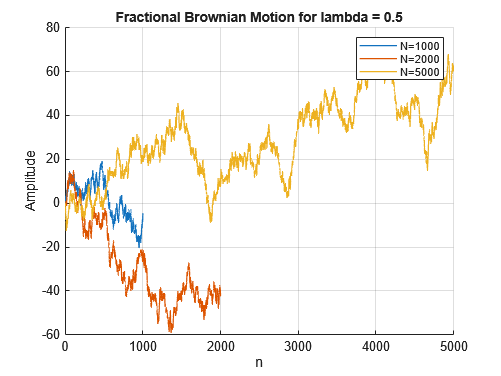</center>


<center>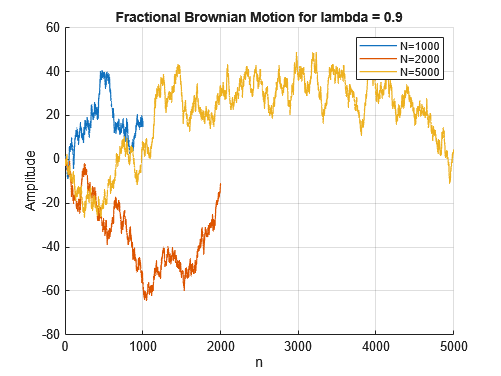</center>




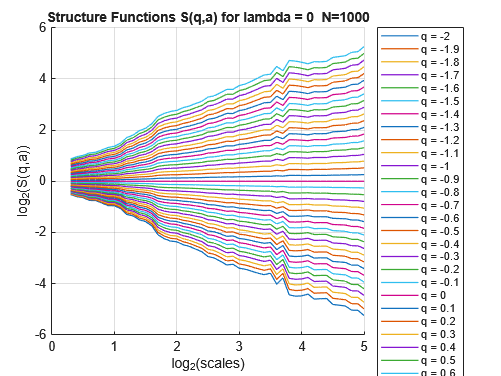


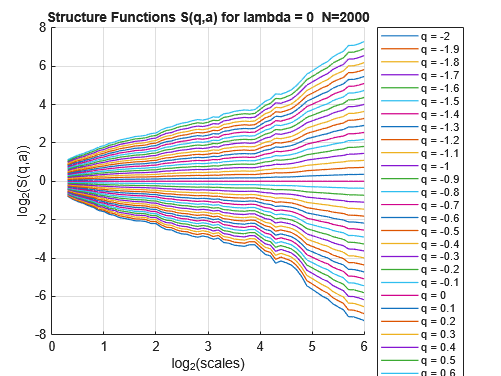

In [4]:

%% ---------------------------------------------------------
% 2. STRUCTURE FUNCTIONS S(q,a) (LOG–LOG) FOR EACH (H, N)
% Reads structfunc{hi,ni}.Tq and .logscales
% ---------------------------------------------------------

q_axis = -2:0.1:2;   % q values for WTMM structure functions

for hi = 1:numH
    for ni = 1:numN
        S    = structfunc{hi,ni}.Tq(:, 1:41);      % structure functions for q=-5:5
        loga = structfunc{hi,ni}.logscales;        % log2(a)

        figure; hold on;
        plot(loga, S, 'LineWidth', 1.0)


        % Legend labels: "a = scale_value"
        legendStrings = "q = " + string(round(q_axis, 3));
        legend(legendStrings, "Location", "bestoutside")

        xlabel("log_2(scales)")
        ylabel("log_2(S(q,a))")
        title("Structure Functions S(q,a) for lambda = " + string(lambda(hi))+ ...
              "  N="+string(Nvals(ni)))
        grid on
    end
end

<center>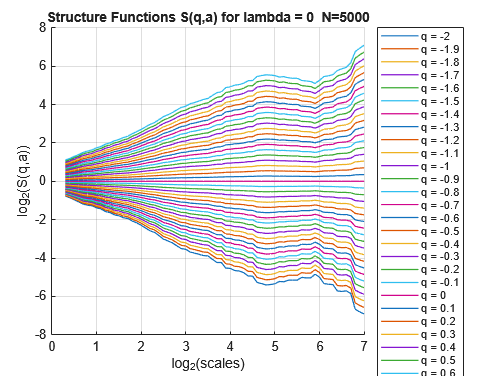</center>


<center>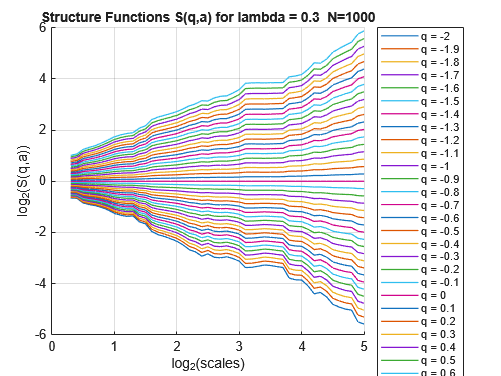</center>


<center>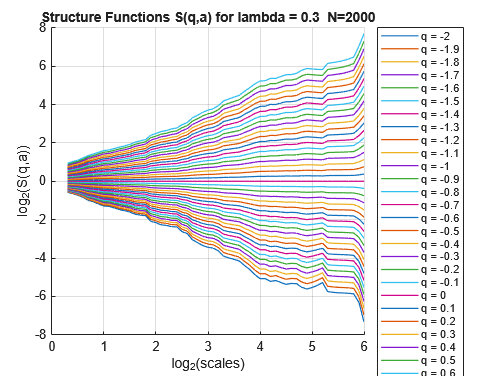</center>


<center>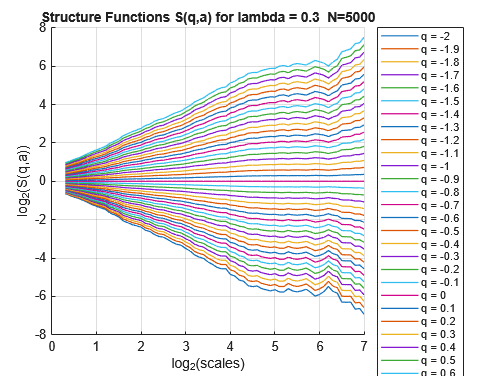</center>


<center>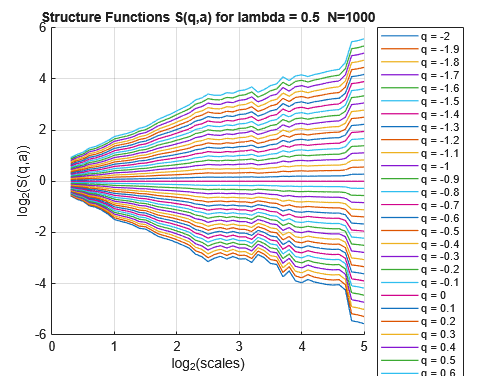</center>


<center>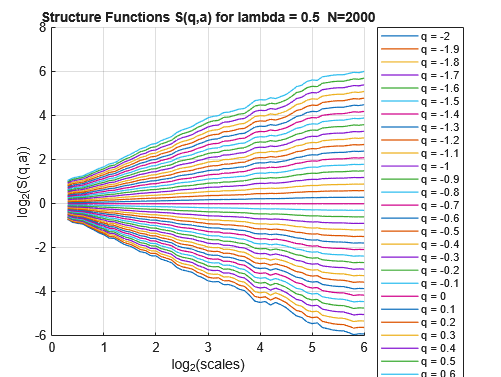</center>


<center>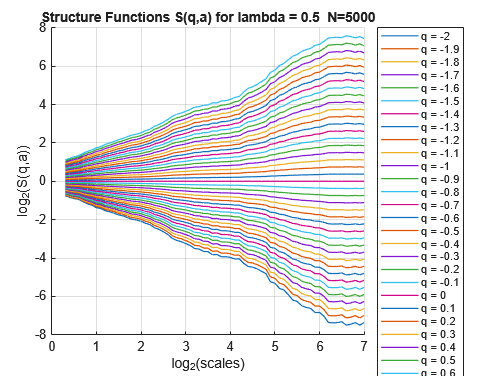</center>


<center>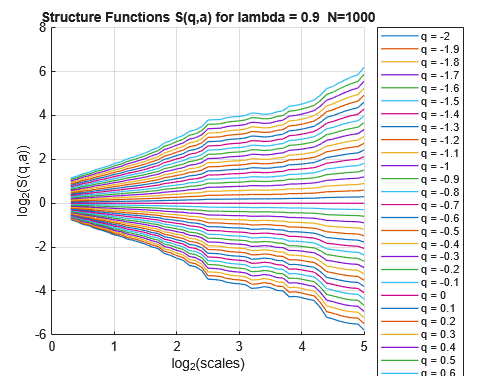</center>


<center>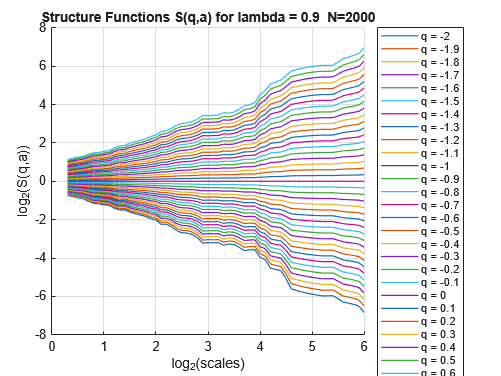</center>


<center>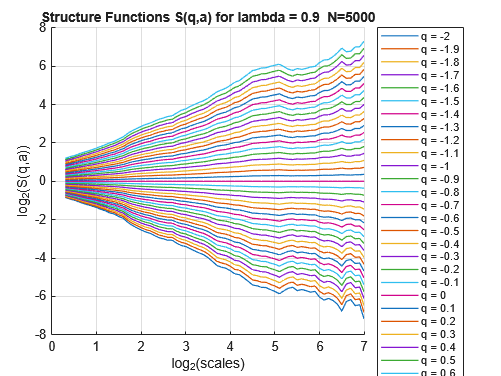</center>




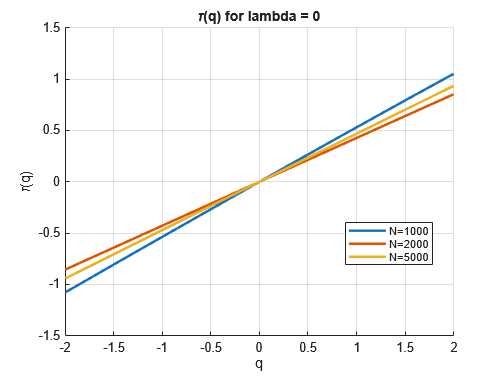


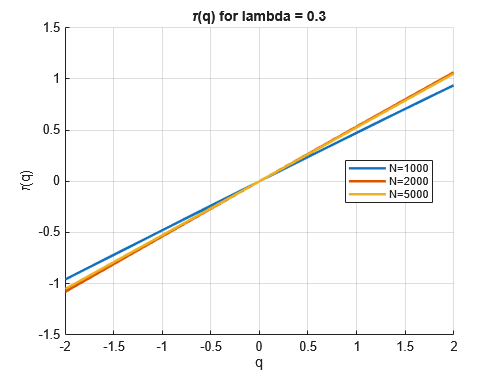

In [5]:

%% ---------------------------------------------------------
% 3. SCALING FUNCTION tau(q) VS NOISE LENGTH (PER H)
% ---------------------------------------------------------
for hi = 1:numH
    figure; hold on;
    for ni = 1:numN
        plot(qvals, tauq{hi,ni}, 'LineWidth', 2, 'Color', colorsN(ni,:));
    end
    xlabel("q"); ylabel("\tau(q)")
    title("\tau(q) for lambda = " + string(lambda(hi)))
    legend("N="+string(Nvals), "Location","Best")
    grid on
end

<center>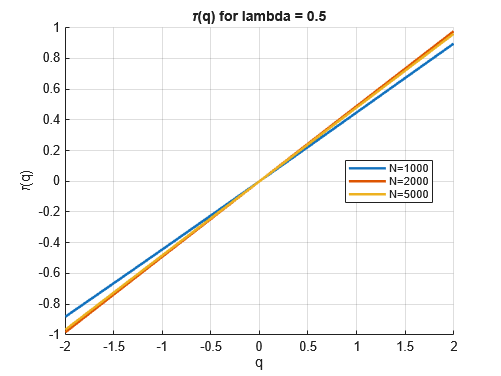</center>


<center>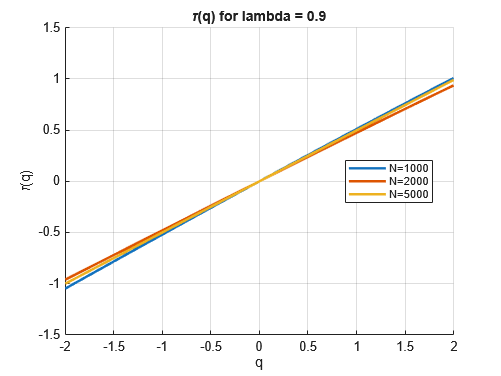</center>



In [6]:

for hi = 1:numH
    for ni = 1:numN
        disp("estimated h for lambda=" + lambda(hi) + " n=" + string(Nvals(ni)) + " h=" + string(h{hi,ni}))
    end
end

estimated h for lambda=0 n=1000 h=0.53328
estimated h for lambda=0 n=2000 h=0.4272
estimated h for lambda=0 n=5000 h=0.46901
estimated h for lambda=0.3 n=1000 h=0.47616
estimated h for lambda=0.3 n=2000 h=0.53581
estimated h for lambda=0.3 n=5000 h=0.52605
estimated h for lambda=0.5 n=1000 h=0.44608
estimated h for lambda=0.5 n=2000 h=0.48986
estimated h for lambda=0.5 n=5000 h=0.48074
estimated h for lambda=0.9 n=1000 h=0.51518
estimated h for lambda=0.9 n=2000 h=0.47722
estimated h for lambda=0.9 n=5000 h=0.49884